# Visualizing Water Sample Constituents

In [1]:
import pandas as pd 
import statsmodels.formula.api as smf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.ticker import ScalarFormatter
import matplotlib.font_manager as font_manager
import os
import seaborn as sns
import statsmodels as sm
import scipy.stats

In [2]:
#Set the data paths
dat_dir = r''
fig_dir =  r''

# Read data
bhd_wat = pd.read_csv(os.path.join(dat_dir,'.csv'))
bhd_gas_src = pd.read_csv(os.path.join(dat_dir,'.csv'))
bhd_liquids = pd.read_csv(os.path.join(dat_dir,'.csv'))
bhd_gas = pd.read_csv(os.path.join(dat_dir,'.csv'))
prod_liquids = pd.read_csv(os.path.join(dat_dir,'.csv'))
prod_wat = pd.read_csv(os.path.join(dat_dir,'.csv'))
scp = pd.read_csv(os.path.join(dat_dir,'.csv'))
aq = pd.read_csv(os.path.join(dat_dir,'.csv'))
aq_up = pd.read_csv(os.path.join(dat_dir,'.csv'))
adf = pd.read_csv(os.path.join(dat_dir,'.csv')) 


## Water Isotopes

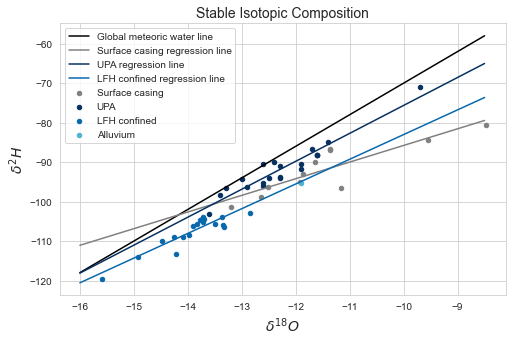

In [20]:
aq_palette = ['#a8ddb5','#7bccc4','#4eb3d3','#2b8cbe', '#216c91', '#0868ac','#084081', '#063060']
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8,5))
x = np.linspace(-16,-8.5, 10)
y = 8 * x + 10
ax.plot(x, y, color = 'black', label='Global meteoric water line')

f = bhd_wat.plot.scatter( x='DELTA 18O H2O',y='DELTA D H2O', color = 'grey', label = 'Surface casing', ax=ax)
m, b = np.polyfit((bhd_wat['DELTA 18O H2O'].dropna()), (bhd_wat['DELTA D H2O'].dropna()), 1)
plt.plot(x, m*x + b, color = 'grey', label = 'Surface casing regression line')

f = adf.plot.scatter( x='d18O H2O (per mil VSMOW)',y='dD H2O (per mil VSMOW)', color = aq_palette[7], label = 'UPA', ax=ax)
m, b = np.polyfit(adf['d18O H2O (per mil VSMOW)'], adf['dD H2O (per mil VSMOW)'], 1)
plt.plot(x, m*x + b, color = aq_palette[7], label = 'UPA regression line')

f = aq_lfhc.plot.scatter( x='d18h2o',y='dDh2o', color = aq_palette[5], label = 'LFH confined', ax=ax)
aq_lfhc_ = aq_lfhc[aq_lfhc['d18h2o'].isna() == False]
aq_lfhc_ = aq_lfhc_[aq_lfhc_['dDh2o'].isna() == False]
m1, b1 = np.polyfit((aq_lfhc_['d18h2o'].dropna()), (aq_lfhc_['dDh2o'].dropna()), 1)
plt.plot(x, m1*x + b1, color = aq_palette[5], label = 'LFH confined regression line')

f = aq_qa.plot.scatter( x='d18h2o',y='dDh2o', color = aq_palette[2], label = 'Alluvium', ax=ax)

plt.xlabel('$\delta ^{18} O$', fontsize=14)
plt.ylabel('$\delta ^{2} H$', fontsize=14)
f.legend()
plt.title('Stable Isotopic Composition', fontsize=14)
plt.savefig(os.path.join(fig_dir, 'Stable_Isotope_Plt.pdf'))

## Categorizing TDS into water types

I found intervals from the EPA for water types (fresh, brackish, saline, brine). The following plots are me playing around with comparing these ranges to the bradenhead samples. https://www.epa.gov/sites/default/files/documents/02_Godsey_-_Source_Options_508.pdf

In [21]:
# set ranges of TDS levels from EPA
fresh = list(range(0, 3000))
brackish = list(range(3000, 10000))
saline =  list(range(10000, 35000))

Here I am plotting TDS, color coding by water type

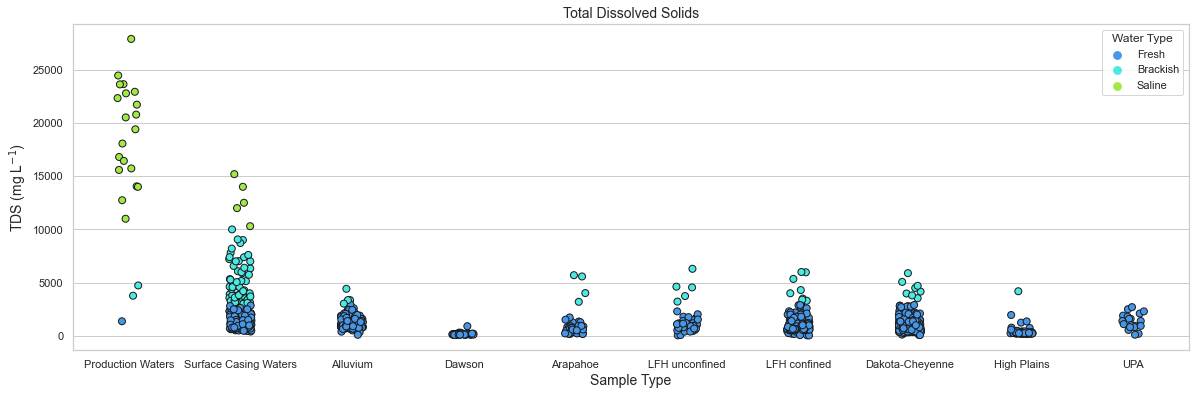

In [30]:
# Plotting TDS with jitter
sns.set(rc = {'figure.figsize':(20,6)})
sns.set_style("whitegrid")
f = sns.stripplot(x = 'Sample Type', y='TOTAL DISSOLVED SOLIDS',  hue = 'Water Type', marker = 'o', s = 7, linewidth = 1, edgecolor = 'k', palette=["#4797E8", "#49E9E4", "#A2E847"], data=d, jitter=True)

#f.set_yscale('log')
plt.ylabel('TDS (mg L$^{-1}$)', fontsize=14)
plt.xlabel('Sample Type', fontsize=14)
plt.title('Total Dissolved Solids', fontsize=14)
ax.legend()
plt.savefig(os.path.join(fig_dir, 'TDS_comparison_water_type_aq.png'))
plt.savefig(os.path.join(fig_dir, 'TDS_comparison_water_type_aq.pdf'))

## Dissolved Metals

boron, barium, iron, manganese, selenium and strontium

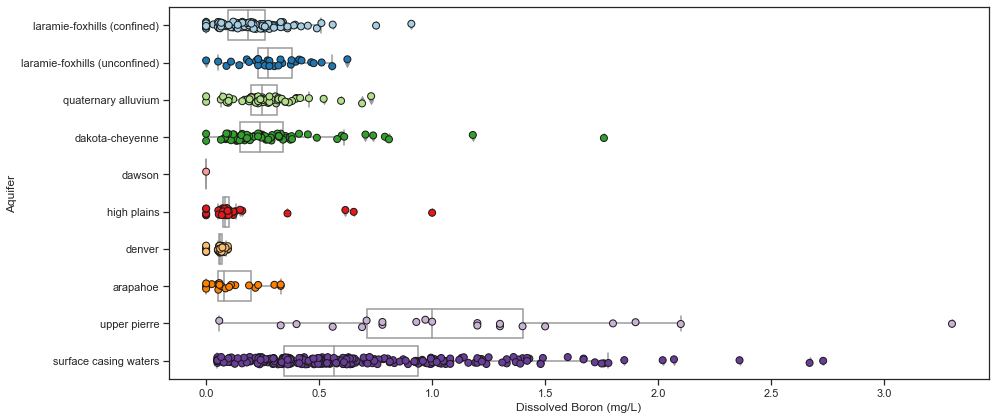

In [151]:
sns.set(rc = {'figure.figsize':(14,6)})
sns.set_style("ticks")
f = sns.stripplot(x = 'b', y='Aquifer', marker = 'o', s = 7, linewidth = 1, edgecolor = 'k', data=sherwood_qc, jitter=True, orient='h', palette = "Paired")
f = sns.boxplot(x = 'b', y='Aquifer', color = 'white' ,data=sherwood_qc, orient='h')
sns.color_palette('colorblind')
plt.tight_layout()
f.set_xlabel('Dissolved Boron (mg/L)')
plt.savefig(os.path.join(fig_dir, 'Dissolved_Boron.png'))
plt.savefig(os.path.join(fig_dir, 'Dissolved_Boron.pdf'))

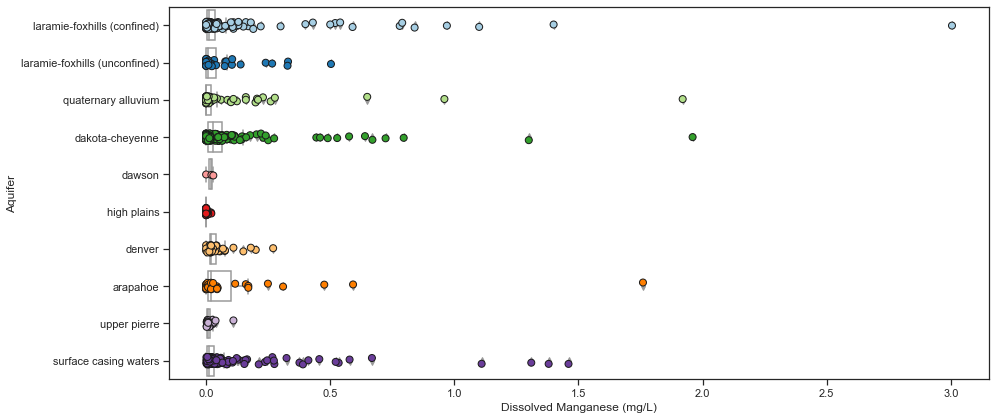

In [153]:
sns.set(rc = {'figure.figsize':(14,6)})
sns.set_style("ticks")
f = sns.stripplot(x = 'mn', y='Aquifer', marker = 'o', s = 7, linewidth = 1, edgecolor = 'k', data=sherwood_qc, jitter=True, orient='h', palette = "Paired")
f = sns.boxplot(x = 'mn', y='Aquifer', color = 'white' ,data=sherwood_qc, orient='h')
sns.color_palette('colorblind')
plt.tight_layout()
f.set_xlabel('Dissolved Manganese (mg/L)')
plt.savefig(os.path.join(fig_dir, 'Dissolved_Manganese.png'))
plt.savefig(os.path.join(fig_dir, 'Dissolved_Manganese.pdf'))

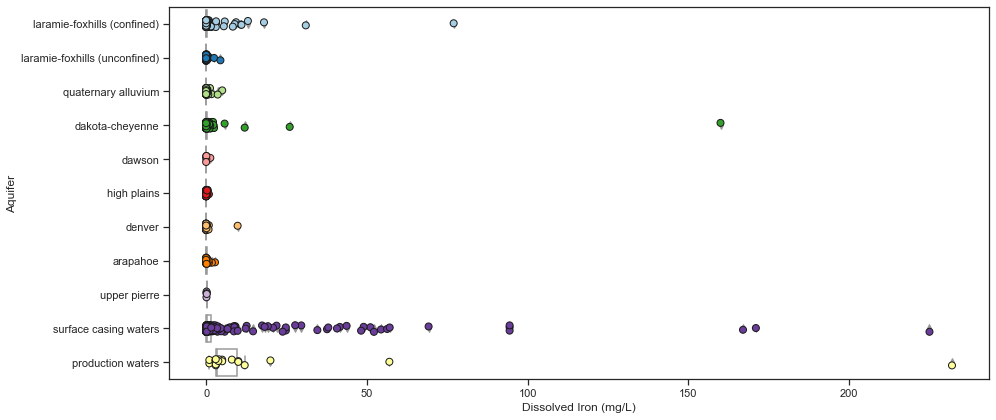

In [155]:
sns.set(rc = {'figure.figsize':(14,6)})
sns.set_style("ticks")
f = sns.stripplot(x = 'fe', y='Aquifer', marker = 'o', s = 7, linewidth = 1, edgecolor = 'k', data=sherwood_qc, jitter=True, orient='h', palette = "Paired")
f = sns.boxplot(x = 'fe', y='Aquifer', color = 'white' ,data=sherwood_qc, orient='h')
plt.tight_layout()
f.set_xlabel('Dissolved Iron (mg/L)')
plt.savefig(os.path.join(fig_dir, 'Dissolved_Iron.png'))
plt.savefig(os.path.join(fig_dir, 'Dissolved_Iron.pdf'))

## BTEX

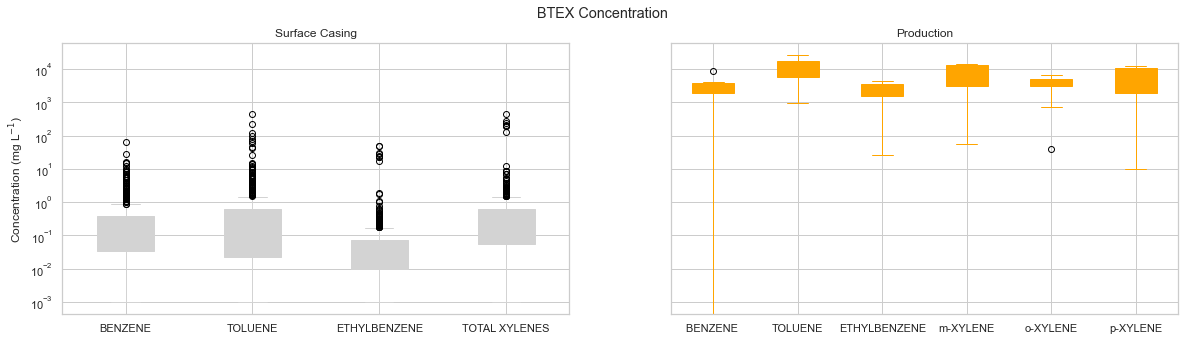

In [42]:
# BTEX
sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5), sharey = True)
fig.suptitle('BTEX Concentration')
d_bhd.boxplot(column=['BENZENE', 'TOLUENE', 'ETHYLBENZENE','TOTAL XYLENES'], ax = ax1, color = 'lightgrey', patch_artist=True)
d_prod.boxplot(column=['BENZENE ', 'TOLUENE', 'ETHYLBENZENE', 'm-XYLENE','o-XYLENE','p-XYLENE'],  ax = ax2, color = 'orange', patch_artist=True)

ax1.set_yscale('log')
ax1.set_ylabel('Concentration (mg L$^{-1}$)')

ax1.set_title('Surface Casing')
ax2.set_title('Production')
plt.savefig(os.path.join(fig_dir, 'BTEX_concentration_log.png'))



 ## Dissolved Gases

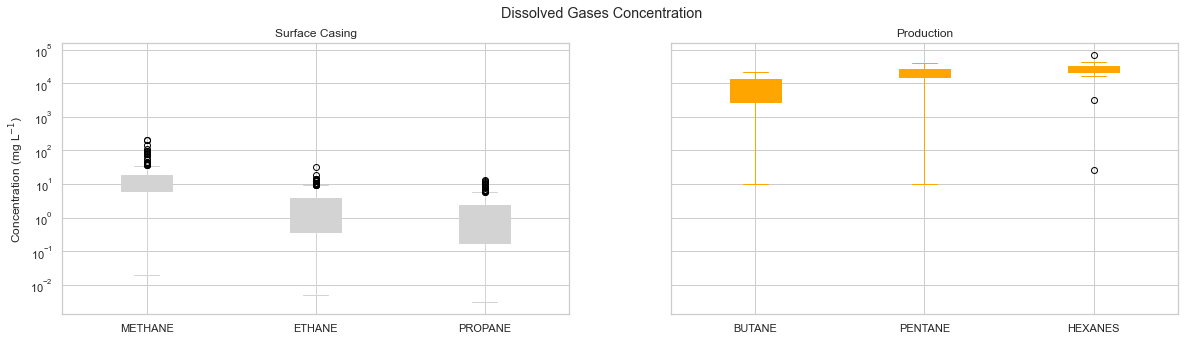

In [43]:
sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5), sharey = True)
fig.suptitle('Dissolved Gases Concentration')
bhd_liq.boxplot(column=['METHANE', 'ETHANE', 'PROPANE'], ax = ax1, color='lightgrey', patch_artist=True)
prod_liq.boxplot(column=['BUTANE', 'PENTANE', 'HEXANES'], ax = ax2, color='orange', patch_artist=True)
ax1.set_yscale('log')
ax1.set_ylabel('Concentration (mg L$^{-1}$)')

ax1.set_title('Surface Casing')
ax2.set_title('Production')
plt.savefig(os.path.join(fig_dir, 'Dissolved_Gas_concentration_log.png'))
